In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [4]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [17]:
start_date = pd.Timestamp("2017-05-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["GME"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


df_gamestop_1 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
df_gamestop_1.head()

GME                                 
                            open     high    low   close   volume
time                                                             
2017-05-19 00:00:00-04:00  23.80  24.3050  23.58  24.220  2087442
2017-05-22 00:00:00-04:00  24.35  24.5995  24.04  24.060  2206389
2017-05-23 00:00:00-04:00  24.37  24.3700  22.63  22.660  5162704
2017-05-24 00:00:00-04:00  22.61  22.8700  22.43  22.715  2175144
2017-05-25 00:00:00-04:00  23.64  23.6700  22.73  23.630  5911630

In [21]:
df_gamestop_1.to_csv("df_gamestop_1.csv")

In [29]:
MC_ten_year_1 = MCSimulation(
    portfolio_data = df_gamestop_1,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [30]:
MC_ten_year_1.portfolio_data.head()

GME                                              
                            open     high    low   close   volume daily_return
time                                                                          
2017-05-19 00:00:00-04:00  23.80  24.3050  23.58  24.220  2087442          NaN
2017-05-22 00:00:00-04:00  24.35  24.5995  24.04  24.060  2206389    -0.006606
2017-05-23 00:00:00-04:00  24.37  24.3700  22.63  22.660  5162704    -0.058188
2017-05-24 00:00:00-04:00  22.61  22.8700  22.43  22.715  2175144     0.002427
2017-05-25 00:00:00-04:00  23.64  23.6700  22.73  23.630  5911630     0.040282

In [31]:
MC_ten_year_1.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.954127,1.006230,0.970645,0.970198,1.082691,0.973313,0.980273,1.001392,0.967788,1.032093,...,1.017070,0.988877,1.051929,0.982528,1.058961,0.963324,0.977288,0.989481,1.101794,1.064668
2,0.983901,1.060482,0.935797,0.937626,1.171033,0.992283,0.997911,0.983709,1.046032,1.071751,...,0.975529,0.991216,1.102090,0.937207,1.018062,1.009583,0.984187,0.951948,1.086107,1.041565
3,0.952588,1.023684,1.048871,0.950754,1.196628,1.041572,1.005114,1.002007,1.076048,1.139633,...,1.009339,0.973057,1.077143,0.962384,1.008807,1.019810,0.911818,0.966358,1.139749,1.029515
4,0.927833,0.972276,1.092323,1.033849,1.129509,1.069606,0.956972,1.045703,1.000412,1.140620,...,0.965593,0.918631,1.032057,0.982287,1.020994,1.051063,0.918261,0.968753,1.169256,0.977855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.000493,0.000060,0.000172,0.001295,0.004114,0.002792,0.012514,0.011535,0.011540,0.013678,...,0.074056,0.006397,0.000237,0.001064,0.001019,0.000111,0.003085,1.702771,0.001638,0.005042
2517,0.000479,0.000058,0.000166,0.001342,0.004284,0.002741,0.012971,0.012171,0.011450,0.013927,...,0.077252,0.006646,0.000232,0.001071,0.000978,0.000105,0.003050,1.680449,0.001603,0.005161
2518,0.000482,0.000055,0.000172,0.001272,0.004314,0.002503,0.012745,0.013297,0.011246,0.013467,...,0.080775,0.006566,0.000222,0.001101,0.000919,0.000104,0.003114,1.571522,0.001618,0.005029
2519,0.000484,0.000055,0.000157,0.001370,0.003952,0.002678,0.012661,0.013364,0.011443,0.013820,...,0.079966,0.006847,0.000227,0.001019,0.000987,0.000108,0.002857,1.538115,0.001685,0.005163


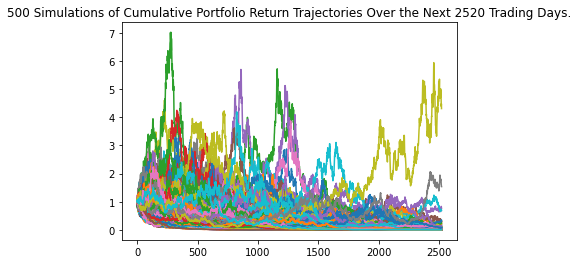

In [32]:
line_plot_1 = MC_ten_year_1.plot_simulation()

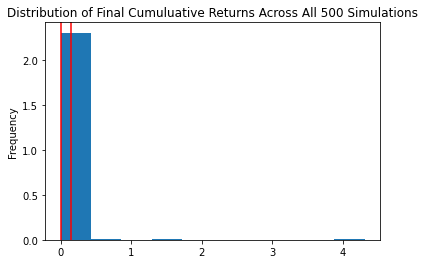

In [33]:
dist_plot_1 = MC_ten_year_1.plot_distribution()

In [36]:
tbl_1 = MC_ten_year_1.summarize_cumulative_return()

print(tbl_1)

count           500.000000
mean              0.029703
std               0.212167
min               0.000010
25%               0.000699
50%               0.002695
75%               0.011561
max               4.311860
95% CI Lower      0.000056
95% CI Upper      0.144829
Name: 2520, dtype: float64


In [18]:

start_date = pd.Timestamp("2018-05-19", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-19", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["GME"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"


df_gamestop_2 = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Preview DataFrame
df_gamestop_2.head()

GME                                
                            open    high    low   close   volume
time                                                            
2018-05-21 00:00:00-04:00  12.52  12.885  12.49  12.765  4690915
2018-05-22 00:00:00-04:00  12.78  12.910  12.54  12.615  4030010
2018-05-23 00:00:00-04:00  12.54  12.750  12.44  12.710  2822301
2018-05-24 00:00:00-04:00  12.58  12.780  12.45  12.730  2678786
2018-05-25 00:00:00-04:00  12.75  12.800  12.58  12.640  2170417

In [20]:
df_gamestop_2.to_csv("df_gamestop_2.csv")

In [37]:
MC_ten_year_2 = MCSimulation(
    portfolio_data = df_gamestop_2,
    weights = [1],
    num_simulation = 500,
    num_trading_days = 252 * 10
)

In [38]:
MC_ten_year_2.portfolio_data.head()

GME                                             
                            open    high    low   close   volume daily_return
time                                                                         
2018-05-21 00:00:00-04:00  12.52  12.885  12.49  12.765  4690915          NaN
2018-05-22 00:00:00-04:00  12.78  12.910  12.54  12.615  4030010    -0.011751
2018-05-23 00:00:00-04:00  12.54  12.750  12.44  12.710  2822301     0.007531
2018-05-24 00:00:00-04:00  12.58  12.780  12.45  12.730  2678786     0.001574
2018-05-25 00:00:00-04:00  12.75  12.800  12.58  12.640  2170417    -0.007070

In [39]:
MC_ten_year_2.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.960992,1.107034,0.803669,1.241028,0.920050,1.076205,1.052723e+00,1.013775,1.023960,0.953215,...,0.961632,1.176396,1.115411,0.903479,0.949633,1.097191,0.987914,0.943680,1.187526,1.080520
2,1.128804,0.964851,0.665748,0.842612,1.119758,1.293959,1.072079e+00,0.964915,0.963581,1.046476,...,0.766294,1.198031,1.113038,0.848573,0.790945,0.938223,1.072663,0.815038,1.097313,1.152395
3,1.036962,0.892840,0.857960,0.972337,1.276103,1.656589,1.076060e+00,0.936497,1.065813,1.042689,...,0.888191,1.123959,1.338873,0.834928,0.739618,1.198944,1.166951,0.784332,0.952899,0.989622
4,0.879192,0.825442,0.768425,0.820517,1.443155,1.578190,1.009877e+00,0.898444,1.134820,0.806204,...,0.886317,1.222393,1.210039,0.776715,0.719935,1.334220,1.140800,0.897463,1.124318,0.997152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,46754.266052,0.236015,6690.464544,93486.047445,659.419083,32860.009968,4.502704e+06,41.433574,33.665458,52.400735,...,62.525832,0.007687,2160.095253,154.398728,5339.402367,19.346383,502064.838006,3.191932,290240.999420,31701.590349
2517,55104.768768,0.226047,7451.032335,107492.104208,567.141518,28055.015416,4.838777e+06,38.082437,33.608086,55.811497,...,66.165565,0.008309,2368.620921,131.176246,4516.813451,19.806781,527980.796381,3.374562,328189.845875,28722.457464
2518,61817.179075,0.202042,8231.958789,115466.869808,489.253770,29112.380737,4.698101e+06,42.201448,35.334458,60.048301,...,78.528578,0.007118,2291.101716,147.891673,4742.908071,21.036406,491681.049755,3.577716,348725.403794,29171.340387
2519,68138.535766,0.169437,7939.471061,124601.168310,517.494358,31478.391928,4.680402e+06,38.439222,33.164363,59.017843,...,82.874636,0.006590,2429.319119,160.615904,5116.134336,19.308140,540614.846596,3.321231,312094.196796,31997.272218


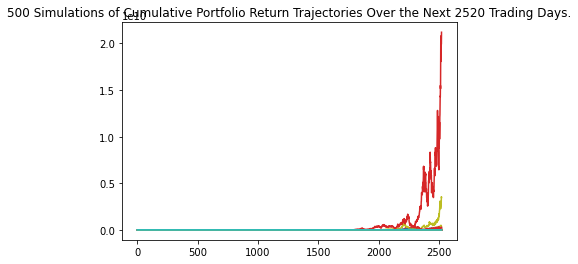

In [40]:
line_plot_2 = MC_ten_year_2.plot_simulation()

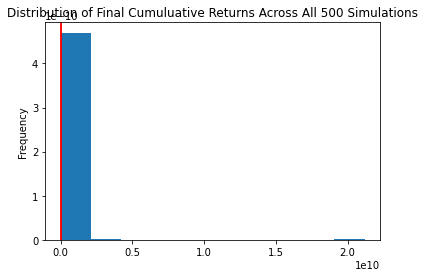

In [41]:
dist_plot_2 = MC_ten_year_2.plot_distribution()

In [45]:
tbl_2 = MC_ten_year_2.summarize_cumulative_return()

print(tbl_2)

count           5.000000e+02
mean            5.249359e+07
std             9.610133e+08
min             3.030888e-06
25%             7.600843e+00
50%             4.074233e+02
75%             1.306124e+04
max             2.120751e+10
95% CI Lower    6.684078e-03
95% CI Upper    2.257737e+07
Name: 2520, dtype: float64
